# Imports

In [56]:
%matplotlib inline
import numpy
import pandas
import datetime
import matplotlib.pyplot as plt

In [57]:
with open("pyfim.py") as fp:
    exec(fp.read())
# from pyfim import *  # LOCALLY
# import urllib.request  # REMOTELY
# a = urllib.request.urlopen("https://members.loria.fr/EGalbrun/UEF_LPD/assignment/pyfim.py")
# exec(a.read())

# The House dataset

The `house` dataset includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. This is a relatively small dataset (435 instances). More information at https://archive.ics.uci.edu/ml/datasets/congressional+voting+records

## Pre-processing

Let's start by reading the data and displaying an outline.

In [58]:
cnames = [
    'Class', 'Handicapped infants', 'Water project cost sharing', 'Adoption of the budget resolution',
    'Physician fee freeze', 'El Salvador aid', 'Religious groups in schools', 'Anti-satellite test ban',
    'Aid to Nicaraguan Contras', 'Mx Missile', 'Immigration', 'Synfuels Corporation cutback',
    'Education spending', 'Superfund right to sue', 'Crime', 'Duty free exports',
    'Export administration act South Africa']
dtf = pandas.read_csv('house.data', sep=",", names=cnames)
dtf

,Class,Handicapped infants,Water project cost sharing,Adoption of the budget resolution,Physician fee freeze,El Salvador aid,Religious groups in schools,Anti-satellite test ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export administration act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


The dataset consists of `17 attributes`, all categorical. 

The `Class` attribute consists of two options: `republican` and `democrat`. The other attributes consist of `y`, `n`, or `?`, representing the chosen vote (y = yes, n = no), or neutrality/undisclosed (`?`).

Now, we must prepare the data with binarization to obtain discrete items for Frequent Itemset Mining.

In [59]:
dcols = [] # to store the data columns corresponding to the new attributes
item_nbs = [] # to store the number of new attributes created from each original one (for plotting)
item_lbls = [] # to store labels corresponding to the new attributes

First, for the `Class` attribute, we have two categories.

In [60]:
 #! This output looks strange. Is this correct?

var_name, var_cats = ("Class", ["republican", "democrat"])
cols = pandas.crosstab(dtf.index, [dtf[var_name]])  
dcols.extend([cols[nc].values for nc in var_cats])

And for the labels:

In [61]:
item_nbs.append(len(var_cats))
item_lbls.extend(["[%s - %s]" % (var_name, v) for v in var_cats])
item_lbls

['[Class - republican]', '[Class - democrat]']

Now, for the other attributes, we have three categories: `y`, `n`, and `?`.

In [62]:
for var_name, var_cats in [
    ("Handicapped infants", ['y', 'n', '?']),
    ("Water project cost sharing", ['y', 'n', '?']),
    ("Adoption of the budget resolution", ['y', 'n', '?']),
    ("Physician fee freeze", ['y', 'n', '?']),
    ("El Salvador aid", ['y', 'n', '?']),
    ("Religious groups in schools", ['y', 'n', '?']),
    ("Anti-satellite test ban", ['y', 'n', '?']),
    ("Aid to Nicaraguan Contras", ['y', 'n', '?']),
    ("Mx Missile", ['y', 'n', '?']),
    ("Immigration", ['y', 'n', '?']),
    ("Synfuels Corporation cutback", ['y', 'n', '?']),
    ("Education spending", ['y', 'n', '?']),
    ("Superfund right to sue", ['y', 'n', '?']),
    ("Crime", ['y', 'n', '?']),
    ("Duty free exports", ['y', 'n', '?']),
    ("Export administration act South Africa", ['y', 'n', '?']),
]:
    cols = pandas.crosstab(dtf.index, [dtf[var_name]])  
    dcols.extend([cols[nc].values for nc in var_cats])
    item_nbs.append(len(var_cats))
    item_lbls.extend(["[%s - %s]" % (var_name, v) for v in var_cats])

Putting everything together, we obtain the binary matrix:

In [63]:
bin_mat = numpy.vstack(dcols).T  # https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
bin_mat[-1]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0], dtype=int64)

Turning the binary matrix into a list of transactions (i.e., sets of items), to be used as input for the FIM algorithm:

In [64]:
tracts = [frozenset(numpy.where(r)[0]) for r in bin_mat]
tracts[-1]

frozenset({0, 3, 5, 9, 11, 14, 17, 21, 24, 27, 29, 33, 35, 38, 41, 46, 48})

## Statistics

In [65]:
len(tracts)

435

There are `435 transactions` in total. Each transaction corresponds to one individual voter.

Each transaction contains `17 items`:

In [66]:
set(numpy.sum(bin_mat, axis=1))

{17}

The histogram of the data shows more clearly the voting distribution accross categories:
- for the `Class` attribute, the first bar is `republican`, and the second one is `democrat`;
- for other attributes, the first bar is `y`, second is `n`, third is `?`.

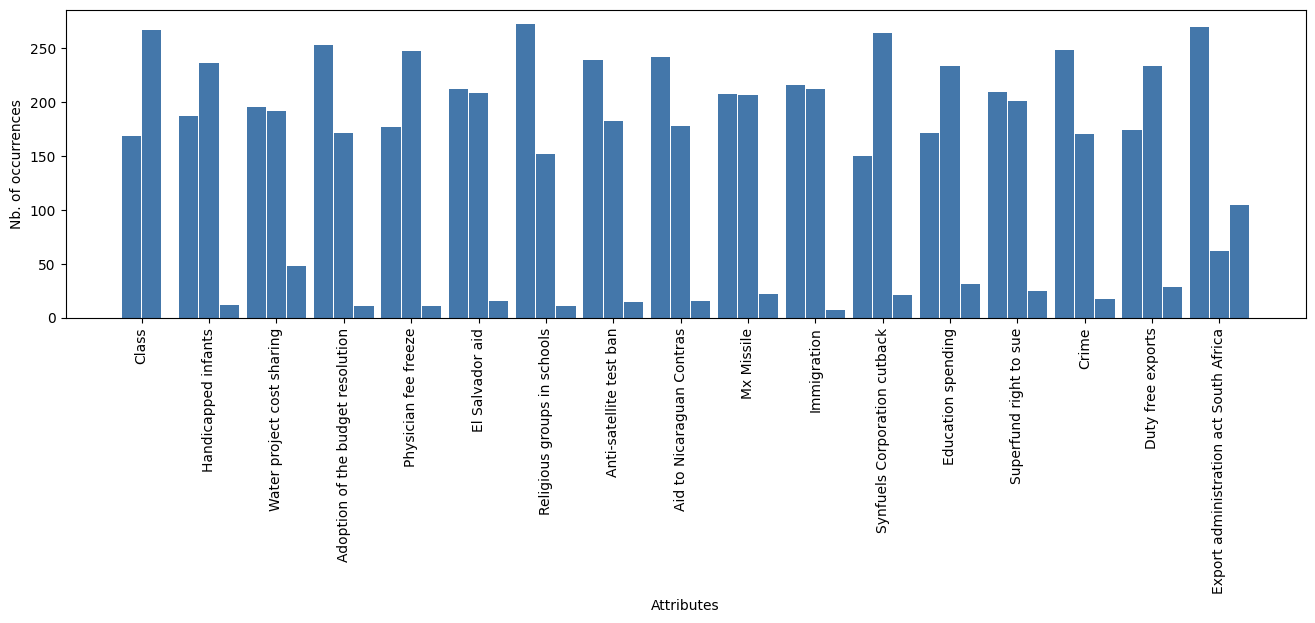

In [67]:
plt.figure(figsize=(16,4))
h = numpy.sum(bin_mat, axis=0)
bw = 0.9/numpy.max(item_nbs)
bf = 0.95
xbs = []
for ni, nb in enumerate(item_nbs):
    xbs.extend([ni+(n-0.5*(nb-1+bf))*bw for n in range(nb)])
plt.bar(xbs, h, width=bf*bw, align='edge', color=(68/255., 119/255., 170/255.))
plt.xticks(range(len(cnames)), cnames, rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("Nb. of occurrences")
plt.show()

According to the dataset information page, we have 267 democrats and 168 republicans, as is evident by the histogram. Some other noticeable points are:
- the votes with most uncertainty (`?`) are `Export administration act South Africa`, `Water project cost sharing`, and `Education spending`. Although they have the most amount of `?` votes, `Export administration...` has a majority of `yes`, `Water project...` is almost evenly divided, and `Education spending` is mostly `no`. This might indicate that `?` does not directly correlate to a consensus, or lack there of, of voting, but possibly as a desire to keep the voter opinion secret;
- the votes with an even amount of `yes` and `no` are: `Water project cost sharing`, `El Salvador aid`, `Mx Missile`, `Immigration`, and `Superfund right to sue`;
- votes with a big majority lead (>25%) on either `yes` or `no` are: `Adoption of the budget resolution` (yes), `Physician fee freeze` (no), `Religious groups in schools` (yes), `Synfuels Corporation cutback` (no), `Crime` (yes), and `Export administration act South Africa` (yes). 

As such, there is a clear difference in frequency for the items in the `house` dataset: votes with `?` are much less frequent than others (except for the `Export administration...` case), and the `yes` or `no` categories vary with the specific vote.


## Mining

Running the FIM algorithm with a support threshold of 15% (0.15*435 ~ 65), we obtain the following:

In [68]:
nb_tot = len(tracts)
FI = fim(tracts, target='s', supp=15)
print("Found %d itemsets\n" % (len(FI)))

Found 31080 itemsets



The top 10 most frequent are:

In [69]:
for fi in sorted(FI, key=lambda x: -x[1])[:10]:
    print(" ".join([item_lbls[x] for x in fi[0]]), fi[0], fi[1], "%.3f" % (fi[1]/nb_tot))

[Religious groups in schools - y] (17,) 272 0.625
[Export administration act South Africa - y] (47,) 269 0.618
[Class - democrat] (1,) 267 0.614
[Synfuels Corporation cutback - n] (33,) 264 0.607
[Adoption of the budget resolution - y] (8,) 253 0.582
[Crime - y] (41,) 248 0.570
[Physician fee freeze - n] (12,) 247 0.568
[Physician fee freeze - n] [Class - democrat] (12, 1) 245 0.563
[Aid to Nicaraguan Contras - y] (23,) 242 0.556
[Anti-satellite test ban - y] (20,) 239 0.549


Most are singletons. Interestingly, the itemset of `democrats` voting `no` for `Physician fee freeze` appears in the top 10.

Restricting the algorithm to itemsets of size 2 gives us the following top 10: 

In [70]:
FI = fim(tracts, target='s', supp=15, zmin=2)
print("Found %d itemsets\n" % (len(FI)))

print('')  # Space between prints

for fi in sorted(FI, key=lambda x: -x[1])[:10]:
    print(" ".join([item_lbls[x] for x in fi[0]]), fi[0], fi[1], "%.3f" % (fi[1]/nb_tot))

Found 31046 itemsets


[Physician fee freeze - n] [Class - democrat] (12, 1) 245 0.563
[Adoption of the budget resolution - y] [Class - democrat] (8, 1) 231 0.531
[Physician fee freeze - n] [Adoption of the budget resolution - y] [Class - democrat] (12, 8, 1) 219 0.503
[Physician fee freeze - n] [Adoption of the budget resolution - y] (12, 8) 219 0.503
[Aid to Nicaraguan Contras - y] [Class - democrat] (23, 1) 218 0.501
[Aid to Nicaraguan Contras - y] [Adoption of the budget resolution - y] (23, 8) 215 0.494
[Crime - y] [Religious groups in schools - y] (41, 17) 214 0.492
[Education spending - n] [Class - democrat] (36, 1) 213 0.490
[Aid to Nicaraguan Contras - y] [Physician fee freeze - n] (23, 12) 211 0.485
[Anti-satellite test ban - y] [Aid to Nicaraguan Contras - y] (20, 23) 210 0.483


This results shows us that, under a support threshold of 15%, the most votes were for `Physician fee freeze - n` and `Adoption of the budget resolution - y` by the `democrats`. Not only that, but the third most votes was the union of those two itemsets.

Since we have 17 attributes, let's have a look at the most frequent maximal itemsets (15% supp. threshold).

In [71]:
FI = fim(tracts, target='m', supp=15, zmin=2)
print("Found %d itemsets\n" % (len(FI)))

i = 1
for fi in sorted(FI, key=lambda x: -x[1])[:10]:
    print(i, " ".join([item_lbls[x] for x in fi[0]]), fi[0], fi[1], "%.3f" % (fi[1]/nb_tot))
    i += 1

Found 1021 itemsets

1 [Immigration - y] [Synfuels Corporation cutback - n] [Export administration act South Africa - y] (29, 33, 47) 94 0.216
2 [Immigration - y] [Handicapped infants - n] [Export administration act South Africa - y] (29, 3, 47) 85 0.195
3 [Handicapped infants - y] [Duty free exports - n] (2, 45) 82 0.189
4 [Water project cost sharing - n] [Immigration - n] (6, 30) 80 0.184
5 [Immigration - y] [Duty free exports - n] [Export administration act South Africa - y] (29, 45, 47) 80 0.184
6 [Duty free exports - n] [Anti-satellite test ban - y] (45, 20) 79 0.182
7 [Water project cost sharing - n] [Handicapped infants - n] [Synfuels Corporation cutback - n] (6, 3, 33) 78 0.179
8 [Education spending - n] [Duty free exports - n] (36, 45) 78 0.179
9 [Adoption of the budget resolution - y] [Religious groups in schools - y] [Export administration act South Africa - y] (8, 17, 47) 78 0.179
10 [Religious groups in schools - n] [Crime - n] [Superfund right to sue - n] [Mx Missile - y]

The resulting itemsets shows us votes that are commonly made together. The top one, for example, could indicate an association such as: if the voter is in favor of `Immigration` and `Export administration act South Africa`, then he is against `Synfuels Corporation cutback`. Or, on the second case, the voter would be against `Handicapped infants`. 

In the top 10 itemsets above, only one of them includes the `Class` attribute. We can see that this frequent itemset states that often `democrats` vote in favor of `Mx Missile`, `Anti-satellite test ban`, `Adoption of the budget resolution`, and `Aid to Nicaraguan Contras`, but against `Religious groups in schools`, `Crime`, `Superfund right to sue`, `Education spending`, `El Salvador aid`, and `Physician fee freeze`.

What if we restricted the resulting itemsets to those that contain one of the categories in the `Class` attribute? Let's see the top 10 most common itemsets of votes for `democrats`:

In [72]:
FI = fim(tracts, target='m', supp=15, zmin=2)
print("Found %d itemsets\n" % (len(FI)))

class_labels = [1]  # democrat
print_limit = 10
i = 1

for fi in sorted(FI, key=lambda x: -x[1]):
    if any(attr in class_labels for attr in fi[0]):  # Only look at itemsets including the Class attrb
        if i <= print_limit:
            print(i, " ".join([item_lbls[x] for x in fi[0]]), fi[0], fi[1], "%.3f" % (fi[1]/nb_tot))
            i += 1

Found 1021 itemsets

1 [Religious groups in schools - n] [Crime - n] [Superfund right to sue - n] [Mx Missile - y] [Education spending - n] [Anti-satellite test ban - y] [Adoption of the budget resolution - y] [El Salvador aid - n] [Aid to Nicaraguan Contras - y] [Class - democrat] [Physician fee freeze - n] (18, 42, 39, 26, 36, 20, 8, 15, 23, 1, 12) 77 0.177
2 [El Salvador aid - n] [Immigration - y] [Adoption of the budget resolution - y] [Anti-satellite test ban - y] [Physician fee freeze - n] [Aid to Nicaraguan Contras - y] [Class - democrat] (15, 29, 8, 20, 12, 23, 1) 77 0.177
3 [Synfuels Corporation cutback - y] [Water project cost sharing - y] [Class - democrat] (32, 5, 1) 75 0.172
4 [Synfuels Corporation cutback - y] [Religious groups in schools - y] [Class - democrat] (32, 17, 1) 75 0.172
5 [Duty free exports - y] [Superfund right to sue - n] [Mx Missile - y] [Education spending - n] [Adoption of the budget resolution - y] [Anti-satellite test ban - y] [El Salvador aid - n] [Ai

The top results has 11 attributes (including `Class`), showing that democrats have a tendency of voting similarly. An interesting point is that the top result shows votes against `Religious groups in schools` (support of 77), but the fourth results shows votes in favor for it (75 support). This may indicate two distinct groups inside the `democrats` group.

What about republicans?

In [73]:
FI = fim(tracts, target='m', supp=15, zmin=2)
print("Found %d itemsets\n" % (len(FI)))

class_labels = [0]  # republican
print_limit = 10
i = 1

for fi in sorted(FI, key=lambda x: -x[1]):
    if any(attr in class_labels for attr in fi[0]):  # Only look at itemsets including the Class attrb
        if i <= print_limit:
            print(i, " ".join([item_lbls[x] for x in fi[0]]), fi[0], fi[1], "%.3f" % (fi[1]/nb_tot))
            i += 1

Found 1021 itemsets

1 [Class - republican] [Export administration act South Africa - y] [Synfuels Corporation cutback - n] [El Salvador aid - y] [Physician fee freeze - y] [Crime - y] (0, 47, 33, 14, 11, 41) 72 0.166
2 [Class - republican] [Anti-satellite test ban - n] [Handicapped infants - n] [Superfund right to sue - y] [Education spending - y] [Duty free exports - n] [Crime - y] [Adoption of the budget resolution - n] [Religious groups in schools - y] [Aid to Nicaraguan Contras - n] [El Salvador aid - y] [Mx Missile - n] [Physician fee freeze - y] (0, 21, 3, 38, 35, 45, 41, 9, 17, 24, 14, 27, 11) 72 0.166
3 [Class - republican] [Export administration act South Africa - y] [Superfund right to sue - y] [El Salvador aid - y] [Crime - y] [Physician fee freeze - y] (0, 47, 38, 14, 41, 11) 70 0.161
4 [Class - republican] [Immigration - y] [Aid to Nicaraguan Contras - n] [Crime - y] [El Salvador aid - y] [Physician fee freeze - y] (0, 29, 24, 41, 14, 11) 69 0.159
5 [Class - republican] [

The top 2 results have the same support value. Interestingly, the 2nd result contains 13 attributes (including `Class`), which indicates a stronger consensus between `republicans` in comparison with `democrats`.

Let's check for a consensus of 5 votes for both `democrats` and `republicans`, only closed frequent itemsets with a support threshold of 30%.

In [74]:
FI = fim(tracts, target='c', supp=30, zmin=6)
print("Found %d itemsets\n" % (len(FI)))

class_labels = [0, 1]  # republican, democrat
print_limit = 10
i = 1

for fi in sorted(FI, key=lambda x: -x[1]):
    if any(attr in class_labels for attr in fi[0]):  # Only look at itemsets including the Class attrb
        if i <= print_limit:
            print(i, " ".join([item_lbls[x] for x in fi[0]]), fi[0], fi[1], "%.3f" % (fi[1]/nb_tot))
            i += 1

Found 43 itemsets

1 [El Salvador aid - n] [Adoption of the budget resolution - y] [Anti-satellite test ban - y] [Physician fee freeze - n] [Aid to Nicaraguan Contras - y] [Class - democrat] (15, 8, 20, 12, 23, 1) 164 0.377
2 [El Salvador aid - n] [Education spending - n] [Adoption of the budget resolution - y] [Physician fee freeze - n] [Aid to Nicaraguan Contras - y] [Class - democrat] (15, 36, 8, 12, 23, 1) 154 0.354
3 [Mx Missile - y] [El Salvador aid - n] [Adoption of the budget resolution - y] [Physician fee freeze - n] [Aid to Nicaraguan Contras - y] [Class - democrat] (26, 15, 8, 12, 23, 1) 152 0.349
4 [El Salvador aid - n] [Education spending - n] [Anti-satellite test ban - y] [Physician fee freeze - n] [Aid to Nicaraguan Contras - y] [Class - democrat] (15, 36, 20, 12, 23, 1) 151 0.347
5 [Mx Missile - y] [El Salvador aid - n] [Anti-satellite test ban - y] [Physician fee freeze - n] [Aid to Nicaraguan Contras - y] [Class - democrat] (26, 15, 20, 12, 23, 1) 150 0.345
6 [Educati

Here, all results are for `democrats`, indicating more frequent consensus of votes when considering only 5 votes (size 6 itemsets).